In [1]:
import numpy as np

In [2]:
def rmse_error(X, a, b, y):
    y_ = np.multiply(X, a) + b
    error = np.square(y_-y)
    tot = np.sum(error)
    tot = tot/len(X)
    return np.sqrt(tot)

In [3]:
rmse_error([1,2], 2, 3, [7, 6])

1.5811388300841898

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

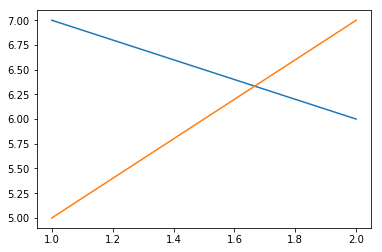

In [5]:
plt.plot([1, 2], [7,6])
plt.plot([1,2], [5,7])
plt.show()

In [27]:
def update_weights(a, b, der_cost_a, der_cost_b, learning_rate = 0.01):
    a = a - (learning_rate*der_cost_a)
    b = b - (learning_rate*der_cost_b)
    return (a, b)

In [28]:
update_weights(2, 3, 1,1)

(1.99, 2.99)

In [29]:
def cal_der_cost(X, a, b, y):
    m = X.shape[0]
    #der_b = 1.0/m * sum([(b + a*X[i] - y[i]) for i in range(m)])
    #der_a = 1.0/m * sum([(b + a*X[i] - y[i])*X[i] for i in range(m)])
    
    
    y_ = np.multiply(X, a) + b
    der_a = np.dot(np.subtract(y_, y).T, X)/len(X)
    #print("%f",der_a)
    der_b = np.sum(np.subtract(y_,y))/len(X)
    return (der_a, der_b)

In [37]:
def gradient_desc(X, y, a=np.random.random(1), b=np.random.random(1), learning_rate = 0.1, iteration=100):
    m = X.shape[0]
    for i in range(iteration):
        der_a, der_b = cal_der_cost(X, a, b, y)
        (a,b) = update_weights(a, b, der_a, der_b, learning_rate)
        #der_b = 1.0/m * sum([(b + a*X[i] - y[i]) for i in range(m)])
        #der_a = 1.0/m * sum([(b + a*X[i] - y[i])*X[i] for i in range(m)])
        #a = a - (learning_rate*der_a)
        #b = b - (learning_rate*der_b)
        #print(rmse_error(X, a, b, y))
        
    return (a, b)

In [38]:
def get_predicitons(X, a, b):
    y_ = np.multiply(X, a) + b
    return y_

## Getting Regression Dataset

In [19]:
from sklearn.datasets import make_regression

In [20]:
X,Y = make_regression(n_samples=100, n_features=1, noise=5, n_targets=1, bias=15)
Y = Y.reshape(Y.shape[0],1)

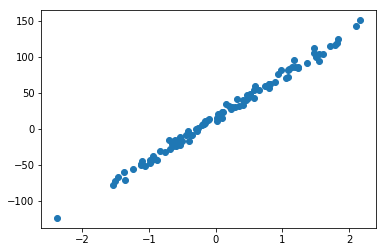

In [13]:
plt.scatter(X, Y)

In [31]:
(a,b) = gradient_desc(np.asarray(X), np.asarray(Y), iteration=1000)

42.8140064629
38.9178236384
35.3883325171
32.1922149852
29.2992836665
26.6821929432
24.316175609
22.1788023796
20.2497616716
18.510657226
16.9448213391
15.5371416674
14.2738998458
13.142620509
12.1319297765
11.2314228533
10.4315410951
9.72345961926
9.09898719192
8.55048050536
8.07077490789
7.65313301902
7.2912114601
6.97904432651
6.71104035831
6.48198943889
6.28707340518
6.12187633526
5.9823904029
5.86501477652
5.76654654357
5.68416395569
5.61540322857
5.55813064057
5.51051180628
5.47097985961
5.43820398106
5.41105934326
5.38859919611
5.37002950702
5.35468633033
5.34201590223
5.33155733839
5.3229277382
5.31580946146
5.30993933095
5.30509951778
5.30110988067
5.29782155041
5.2951115728
5.2928784463
5.29103841239
5.28952237668
5.288273357
5.28724437065
5.28639668676
5.28569838182
5.2851231465
5.28464930054
5.2842589798
5.28393746553
5.28367263132
5.28345448691
5.28327480227
5.28312679763
5.28300488808
5.28290447311
5.28282176312
5.28275363655
5.28269752215
5.28265130198
5.2826132315
5.282

In [32]:
y_ = get_predicitons(X, a, b)

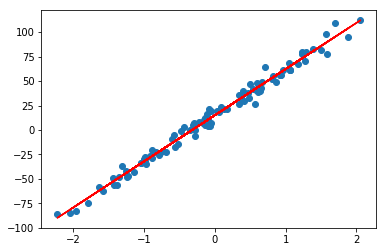

In [33]:
plt.scatter(X, Y)
plt.plot(X, y_, color='R')

In [35]:
def complete_gradient_descent(X, Y, iterations = 1000):
    (a,b) = gradient_desc(np.asarray(X), np.asarray(Y), iteration=1000)
    y_ = get_predicitons(X, a, b)
    plt.scatter(X, Y)
    plt.plot(X, y_, color='R')

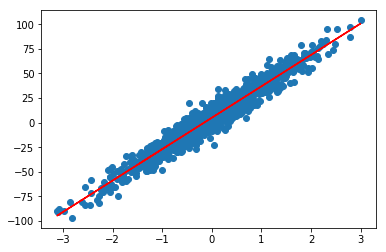

In [44]:
X,Y = make_regression(n_samples=1000, n_features=1, noise=8, n_targets=1, bias=5)
Y = Y.reshape(Y.shape[0],1)
complete_gradient_descent(X, Y, 1000)

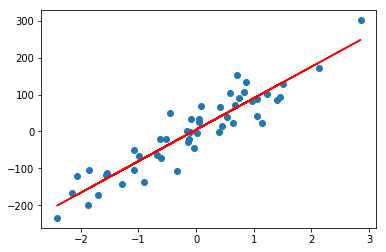

In [50]:
X,Y = make_regression(n_samples=50, n_features=1, noise=40, n_targets=1, bias=2)
Y = Y.reshape(Y.shape[0],1)
complete_gradient_descent(X, Y, 1000)